# Credit Card Fraud Detection

## Data Source:

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

There are 492 frauds out of 284,807 transactions

Features:

1) "Amount": value in dollars of the transaction

2)"Time: amount of time that passed from the time when the first transaction took place.

3) Labels: Fraud = 1 , Not Fraud = 0



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#### Load the data:

In [2]:
cc = pd.read_csv("../input/creditcardfraud/creditcard.csv")
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Check for null values:

In [3]:
cc.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


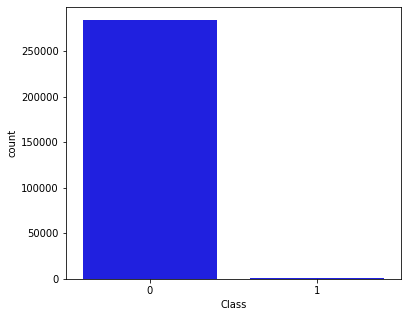

In [4]:
x=cc.Class
plt.figure(figsize = (6,5))
sns.countplot(x, color = "blue")
plt.show()

We can clearly see that there is a large imbalance between the "fraud" and "non-fraud" data labels, so before moving forward with any analysis, we need to balance the data.

#### Balance the Data:

In [5]:
fair_data = cc[cc['Class']==0]
fraud_data = cc[cc['Class']==1]
fair_data.shape, fraud_data.shape

((284315, 31), (492, 31))

In [6]:
fair_data_1 = fair_data.sample(fraud_data.shape[0])


In [7]:
bal_data = fraud_data.append(fair_data_1,ignore_index = True) 
bal_data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [8]:
features = bal_data.drop('Class',axis=1)
labels = bal_data['Class']

#### Split the data into training/test:

In [9]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=.20,random_state=41,stratify = labels)

I decided to do something different and construct a CNN model for this project. I know that normally a CNN model would not be used in this context, but I thought it would be interesting to have to transform the data and see how a CNN model would work. Given this, before constructing the model, the data needs to be transformed from 2D to 3D:

In [10]:
scaler = StandardScaler()
features_train_1 = scaler.fit_transform(features_train)
features_test_1 = scaler.fit_transform(features_test)


features_train = pd.DataFrame(features_train)
features_test = pd.DataFrame(features_test)

In [11]:
features_train = features_train.to_numpy()
features_test = features_test.to_numpy()

In [12]:
features_train = features_train.reshape(features_train.shape[0],features_train.shape[1],1)
features_test = features_test.reshape(features_test.shape[0],features_test.shape[1],1)

features_train.shape, features_test.shape

((787, 30, 1), (197, 30, 1))

## Modeling:


### Model 1: Basic Convolutional Neural Network Model (CNN)

In [13]:
model = Sequential()
model.add(Conv1D(32, 2, activation = "relu", input_shape = (30,1)))
model.add(Dropout(0.1))
model.add(BatchNormalization()) 
model.add(Conv1D(32, 2, activation = "relu"))
model.add(Dropout(0.2))         
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(32, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 32)            2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 896)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 896)               0

2022-10-11 05:55:48.603878: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [14]:
model.compile(optimizer = Adam(lr=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
history = model.fit(features_train, labels_train, epochs = 20,
                    validation_data = (features_test,labels_test),verbose = 1)

2022-10-11 05:55:48.878678: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
25/25 [==============================] - 2s 17ms/step - loss: 0.7260 - accuracy: 0.6074 - val_loss: 0.5412 - val_accuracy: 0.7817
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5740 - accuracy: 0.7001 - val_loss: 0.4564 - val_accuracy: 0.8629
Epoch 3/20
25/25 [==============================] - 0s 6ms/step - loss: 0.4967 - accuracy: 0.7738 - val_loss: 0.4006 - val_accuracy: 0.8782
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.4485 - accuracy: 0.8056 - val_loss: 0.3578 - val_accuracy: 0.8934
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3959 - accuracy: 0.8335 - val_loss: 0.3234 - val_accuracy: 0.8985
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.3635 - accuracy: 0.8628 - val_loss: 0.2962 - val_accuracy: 0.9086
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3440 - accuracy: 0.8780 - val_loss: 0.2751 - val_accuracy: 0.9137
Epoch 8/20
25/25 [=

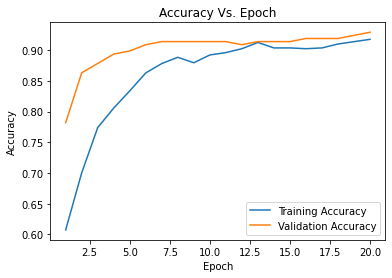

In [16]:
epochs = [i + 1 for i in range(20)]

line1, = plt.plot(epochs, history.history["accuracy"], zorder = 0, label = "Training Accuracy")
line2, = plt.plot(epochs, history.history["val_accuracy"], zorder = 1, label = "Validation Accuracy")

plt.legend(handles = [line1, line2])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs. Epoch")
plt.show()

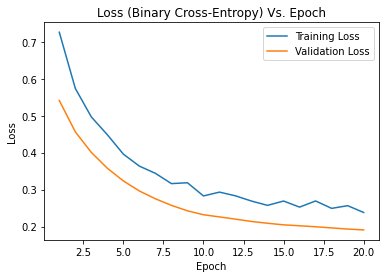

In [17]:

line1, = plt.plot(epochs, history.history["loss"], zorder = 0, label = "Training Loss")
line2, = plt.plot(epochs, history.history["val_loss"], zorder = 1, label = "Validation Loss")

plt.legend(handles = [line1, line2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss (Binary Cross-Entropy) Vs. Epoch")
plt.show()

### Model 2: I will use the same model, expect I will be changing the learning rate from 0.0001 to 0.0005:

In [18]:
model_2 = Sequential()
model_2.add(Conv1D(32, 2, activation = "relu", input_shape = (30,1)))
model_2.add(Dropout(0.1))
model_2.add(BatchNormalization()) 
model_2.add(Conv1D(32, 2, activation = "relu"))
model_2.add(Dropout(0.2))          
model_2.add(Flatten())
model_2.add(Dropout(0.4))
model_2.add(Dense(32, activation = "relu"))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation = "sigmoid"))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
dropout_4 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 32)            128       
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 32)            2080      
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 896)              

In [19]:
model_2.compile(optimizer = Adam(lr=0.0005),loss = 'binary_crossentropy',metrics=['accuracy'])


history_2 = model_2.fit(features_train, labels_train, epochs = 20,
                    validation_data = (features_test,labels_test),verbose = 1)

Epoch 1/20
25/25 [==============================] - 1s 15ms/step - loss: 0.5902 - accuracy: 0.6798 - val_loss: 0.4677 - val_accuracy: 0.8173
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.3514 - accuracy: 0.8729 - val_loss: 0.3425 - val_accuracy: 0.9036
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.2570 - accuracy: 0.9034 - val_loss: 0.2809 - val_accuracy: 0.9137
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.2510 - accuracy: 0.9060 - val_loss: 0.2426 - val_accuracy: 0.9188
Epoch 5/20
25/25 [==============================] - 0s 7ms/step - loss: 0.2453 - accuracy: 0.9199 - val_loss: 0.2551 - val_accuracy: 0.9239
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.2394 - accuracy: 0.9199 - val_loss: 0.2022 - val_accuracy: 0.9188
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.2426 - accuracy: 0.9098 - val_loss: 0.2021 - val_accuracy: 0.9289
Epoch 8/20
25/25 [=

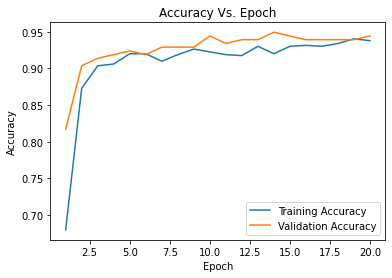

In [20]:
epochs = [i + 1 for i in range(20)]

line1, = plt.plot(epochs, history_2.history["accuracy"], zorder = 0, label = "Training Accuracy")
line2, = plt.plot(epochs, history_2.history["val_accuracy"], zorder = 1, label = "Validation Accuracy")

plt.legend(handles = [line1, line2])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs. Epoch")
plt.show()

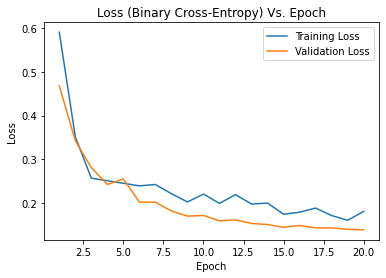

In [21]:
line1, = plt.plot(epochs, history_2.history["loss"], zorder = 0, label = "Training Loss")
line2, = plt.plot(epochs, history_2.history["val_loss"], zorder = 1, label = "Validation Loss")

plt.legend(handles = [line1, line2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss (Binary Cross-Entropy) Vs. Epoch")
plt.show()

### Model 3: adding an extra layer: the MaxPool Layer. 

In [22]:
model_3 = Sequential()
model_3.add(Conv1D(32, 2, activation = "relu", input_shape = (30,1)))
model_3.add(Dropout(0.1))
model_3.add(MaxPool1D(2))
model_3.add(BatchNormalization()) 
model_3.add(Conv1D(32, 2, activation = "relu"))
model_3.add(Dropout(0.2))          
model_3.add(MaxPool1D(2))
model_3.add(Flatten())
model_3.add(Dropout(0.4))
model_3.add(Dense(32, activation = "relu"))
model_3.add(Dropout(0.5))
model_3.add(Dense(1, activation = "sigmoid"))

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
dropout_8 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 14, 32)            0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 32)            128       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 13, 32)            2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 32)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 6, 32)            

In [23]:
model_3.compile(optimizer = Adam(lr=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])


history_3 = model_3.fit(features_train, labels_train, epochs = 20,
                    validation_data = (features_test,labels_test),verbose = 1)

Epoch 1/20
25/25 [==============================] - 2s 27ms/step - loss: 0.8857 - accuracy: 0.4651 - val_loss: 0.7348 - val_accuracy: 0.4518
Epoch 2/20
25/25 [==============================] - 0s 7ms/step - loss: 0.7759 - accuracy: 0.5527 - val_loss: 0.6392 - val_accuracy: 0.4975
Epoch 3/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6926 - accuracy: 0.5997 - val_loss: 0.5805 - val_accuracy: 0.8274
Epoch 4/20
25/25 [==============================] - 0s 7ms/step - loss: 0.6476 - accuracy: 0.6353 - val_loss: 0.5355 - val_accuracy: 0.8629
Epoch 5/20
25/25 [==============================] - 0s 9ms/step - loss: 0.5925 - accuracy: 0.6658 - val_loss: 0.5039 - val_accuracy: 0.8731
Epoch 6/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5717 - accuracy: 0.6849 - val_loss: 0.4690 - val_accuracy: 0.8832
Epoch 7/20
25/25 [==============================] - 0s 7ms/step - loss: 0.5227 - accuracy: 0.7306 - val_loss: 0.4388 - val_accuracy: 0.8832
Epoch 8/20
25/25 [=

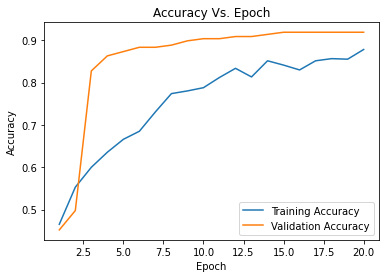

In [24]:
epochs = [i + 1 for i in range(20)]

line1, = plt.plot(epochs, history_3.history["accuracy"], zorder = 0, label = "Training Accuracy")
line2, = plt.plot(epochs, history_3.history["val_accuracy"], zorder = 1, label = "Validation Accuracy")

plt.legend(handles = [line1, line2])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy Vs. Epoch")
plt.show()

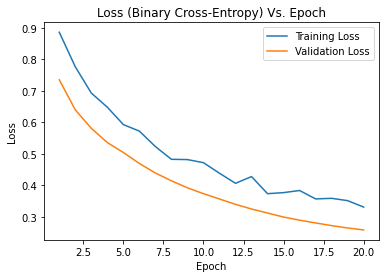

In [25]:
line1, = plt.plot(epochs, history_3.history["loss"], zorder = 0, label = "Training Loss")
line2, = plt.plot(epochs, history_3.history["val_loss"], zorder = 1, label = "Validation Loss")

plt.legend(handles = [line1, line2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss (Binary Cross-Entropy) Vs. Epoch")
plt.show()

Out of all the three models, the 2nd model appeared to have the best results. The 1st model worked out relatively well, but adding the MaxPool layer to the 2rd model clearly had the opposite effect, and actually lowered the accuracy of the model. So, I went ahead and predicted the accuracy on the test set using Model #2: 

In [26]:
accuracy = model_2.evaluate(features_train,labels_train)
accuracy

25/25 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9416


[0.14877083897590637, 0.9415501952171326]

It appears that the accuracy of model with the test set data would be around 0.9479. 

#### Results/Conclusion:

I honestly was not sure how a CNN model would work. The only context I had used it in before was for image-based data. My original plan was to use a supervised-learning model, such as a KNN or a Logistic Regression. However, I am happy that I  decided to take an alternative approach, and it luckily resulted in a pretty good accuracy score.